# Exploratory Data Analysis (EDA) on Solar Farm Data For benin-malanville

This notebook performs an in-depth analysis of the solar farm data, focusing on various aspects such as summary statistics, data quality checks, time series analysis, and more. The analysis is divided into multiple sections to address different aspects of the data.


In [141]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

import pandas as pd
from data_quality import DataQualityCheck
from time_series import TimeSeriesAnalysis
from correlation_analysis import CorrelationAnalysis
from wind_analysis import WindAnalysis
from temperature_humidity import TemperatureHumidityAnalysis
from histograms import Histograms
from bubble_charts import BubbleCharts
from z_score import ZScoreAnalysis
from data_cleaning import DataCleaning


## Loan Data

find the csv file and store it in a variable

In [142]:
# Load data
df_benin = pd.read_csv('../data/benin-malanville.csv')

## Summary Statistics

Calculating basic summary statistics for each numeric column to understand the data distribution.

In [143]:
# Summary Statistics
print(df_benin.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

## Data Quality Check

Checking for missing values, outliers, and incorrect entries in critical columns like GHI, DNI, DHI, and sensor readings (ModA, ModB).

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


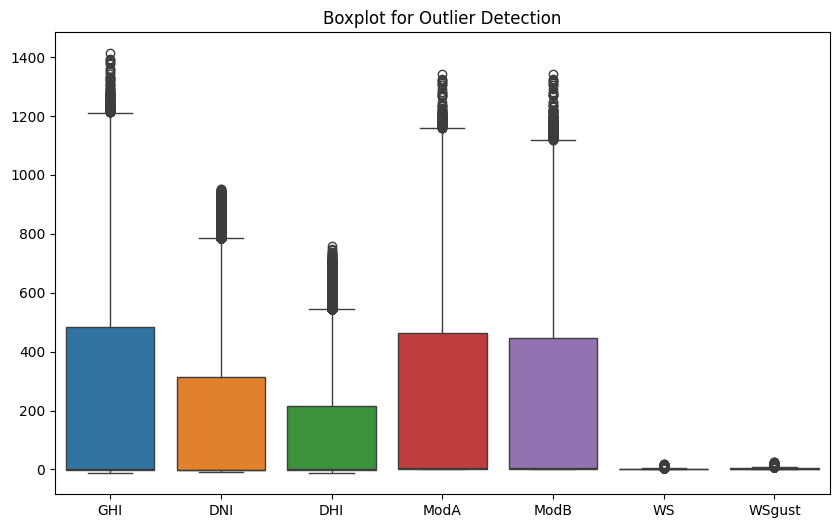

In [144]:
# Perform data quality check
data_quality = DataQualityCheck(df_benin)
print(data_quality.check_missing_values())
data_quality.check_negative_values(['GHI', 'DNI', 'DHI'])
data_quality.plot_outliers(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])


## Data Cleaning

Based on the analysis, handling anomalies and missing values, especially in critical columns.

In [145]:
# Data cleaning
data_cleaning = DataCleaning(df_benin)
df_benin_cleaned = data_cleaning.drop_na_comments()
df_benin_cleaned = data_cleaning.fill_missing_values('GHI', df_benin_cleaned['GHI'].mean())

c:\Moonlight-Energy-Solutions-solar-farm-data-Analysis\scripts\data_cleaning.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(value, inplace=True)
c:\Moonlight-Energy-Solutions-solar-farm-data-Analysis\scripts\data_cleaning.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column].fillna(value, inplace=Tru

## Time Series Analysis

Plotting line graphs for GHI, DNI, DHI, and Tamb over time to observe patterns and trends.

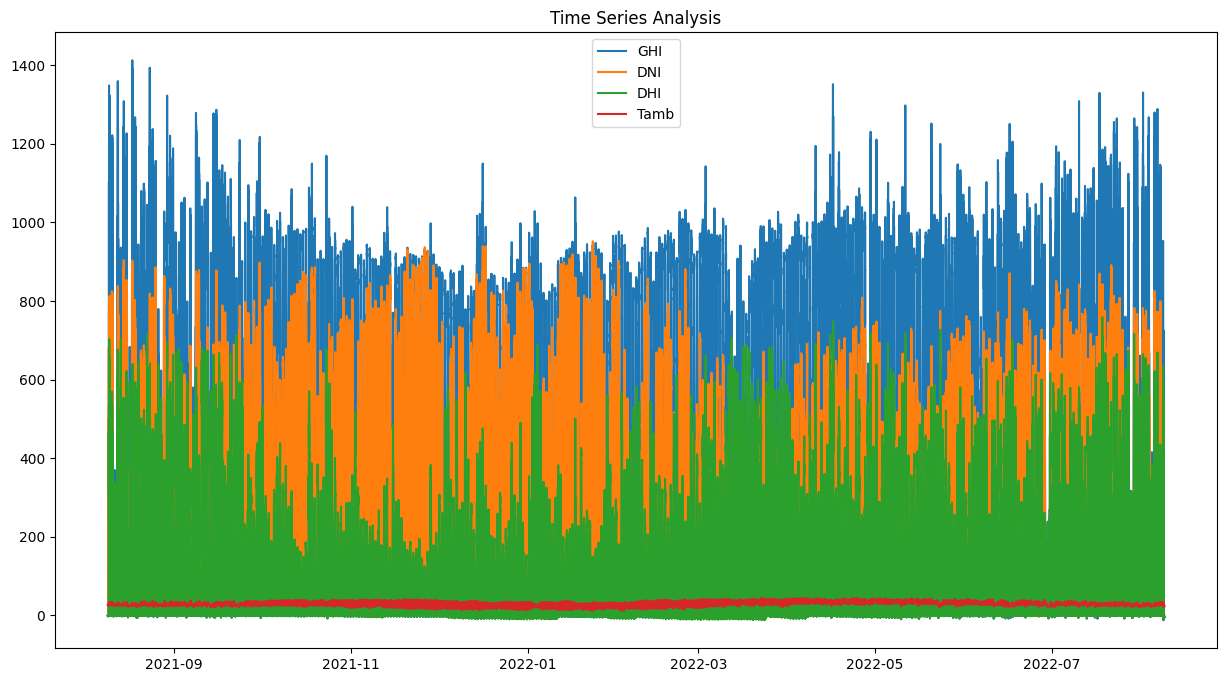

In [146]:
# Time series analysis
time_series = TimeSeriesAnalysis(df_benin)
time_series.plot_time_series(['GHI', 'DNI', 'DHI', 'Tamb'])

## Impact of Cleaning on Sensor Readings

Evaluating how the cleaning process (based on the 'Cleaning' column) affects the sensor readings (ModA, ModB) over time.


## Correlation Analysis

Using heatmaps and scatter plots to visualize correlations between variables like solar radiation components and temperature.

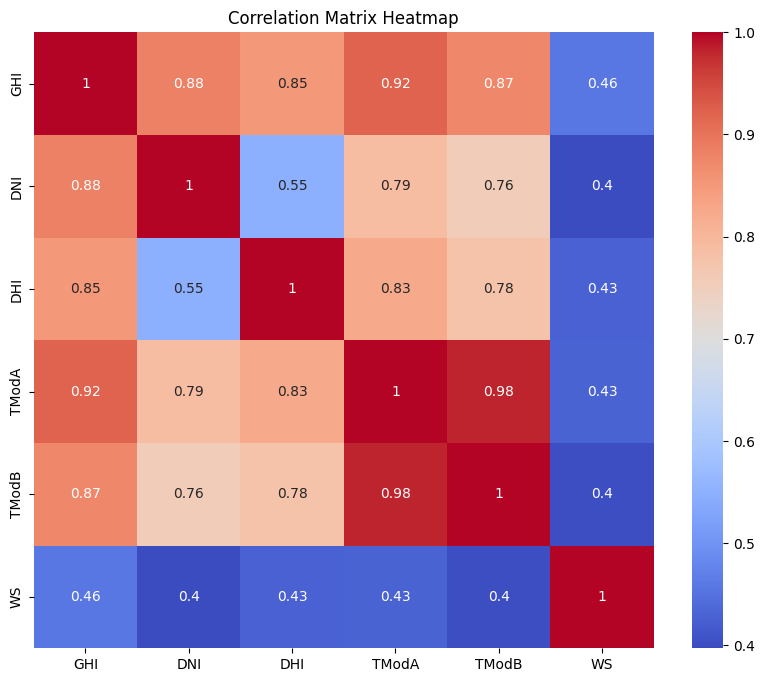

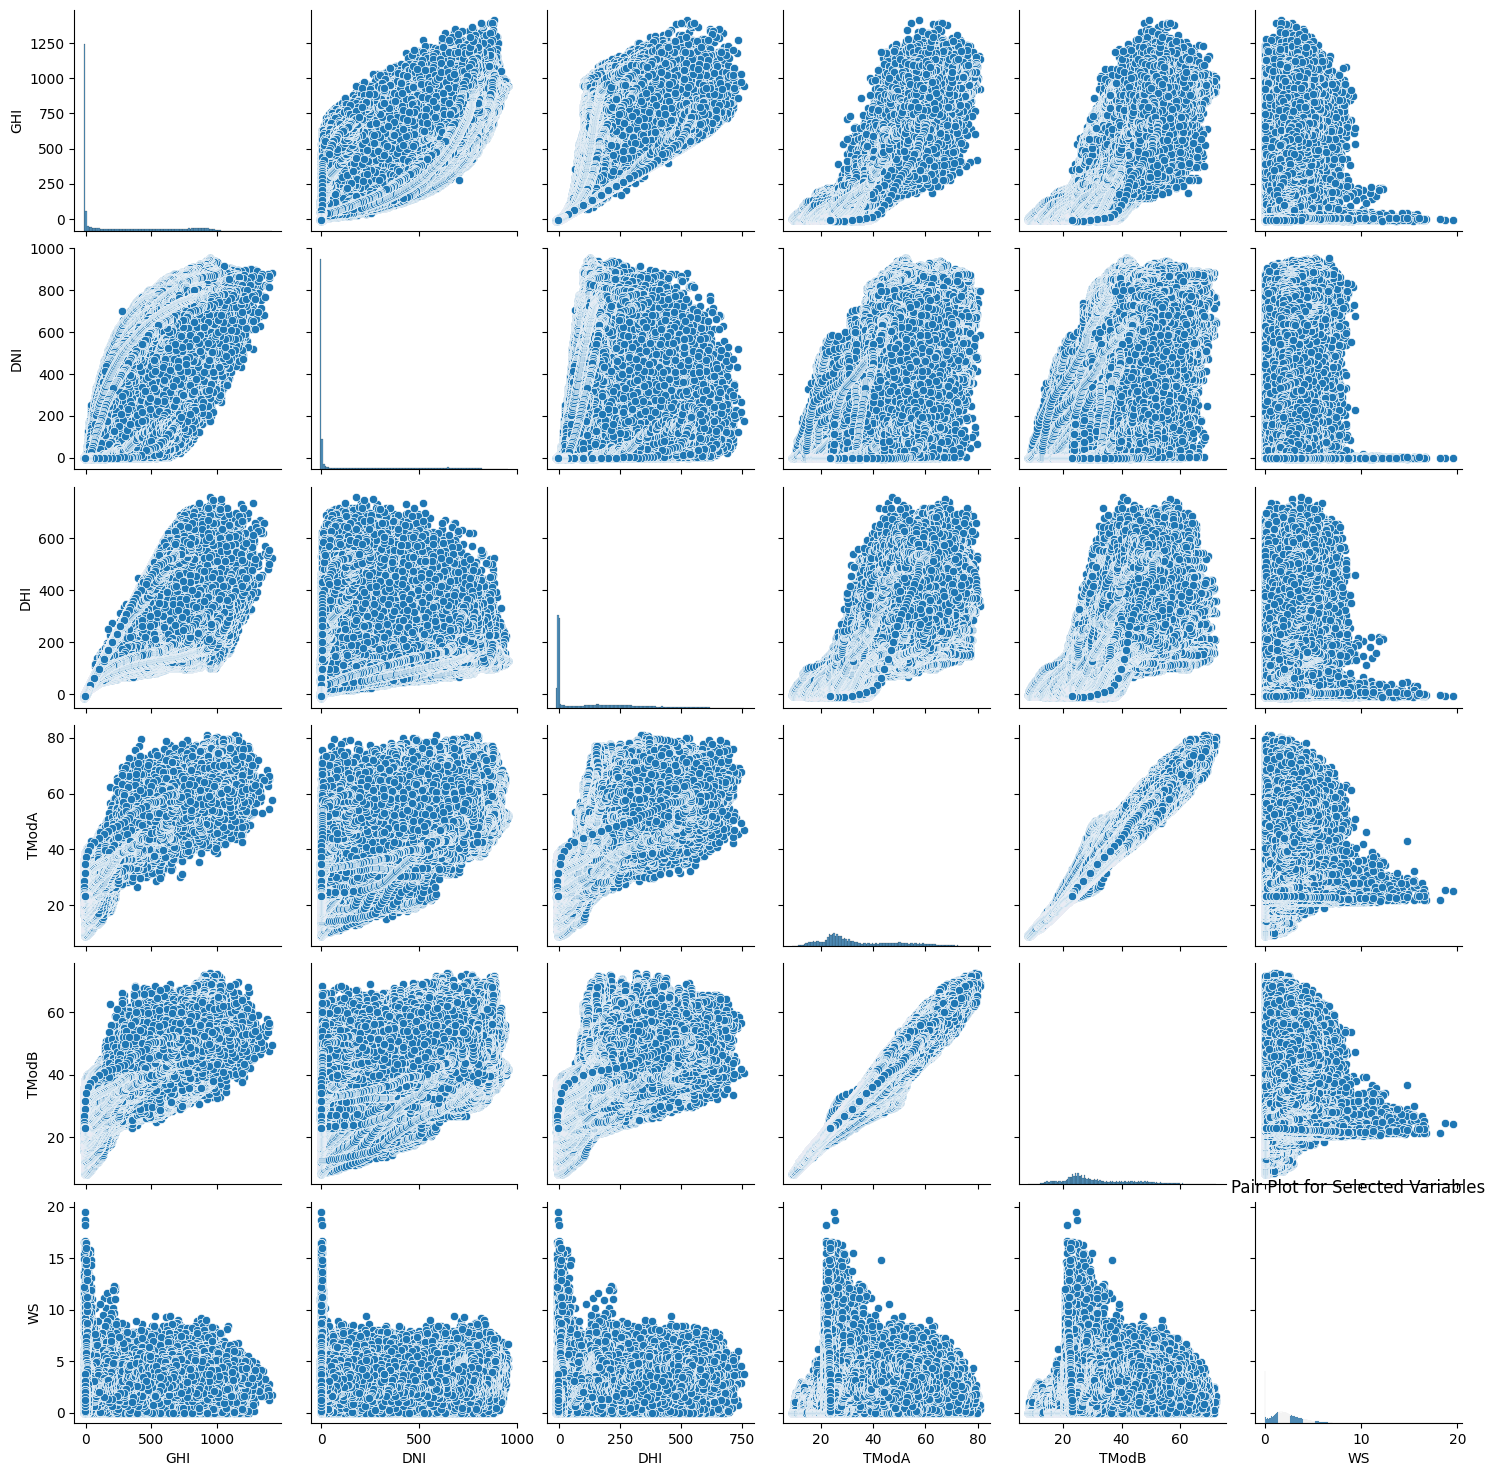

In [147]:
# Correlation analysis
correlation_analysis = CorrelationAnalysis(df_benin)
correlation_analysis.plot_correlation_matrix(['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS'])
correlation_analysis.plot_pairplot(['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS'])

## Wind Analysis

Using polar plots to identify trends in wind speed and direction.

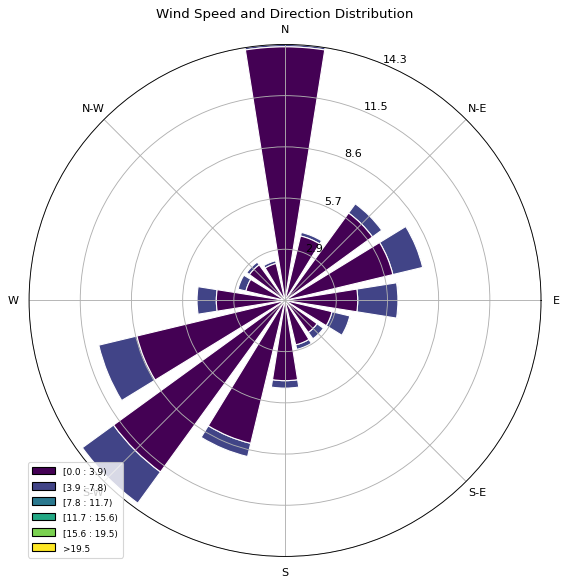

In [148]:
# Wind analysis
wind_analysis = WindAnalysis(df_benin)
wind_analysis.plot_wind_rose()

## Temperature and Humidity Analysis

Examining how relative humidity (RH) influences temperature readings and solar radiation.

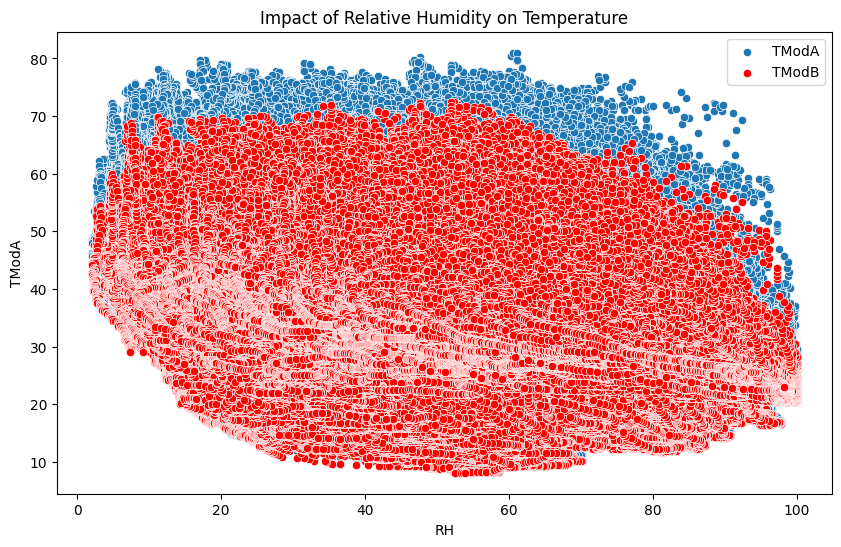

In [149]:
# Temperature and humidity analysis
temp_humidity = TemperatureHumidityAnalysis(df_benin)
temp_humidity.plot_temperature_vs_humidity()

## Histograms

Creating histograms for GHI, DNI, DHI, WS, and temperature to understand their distributions.

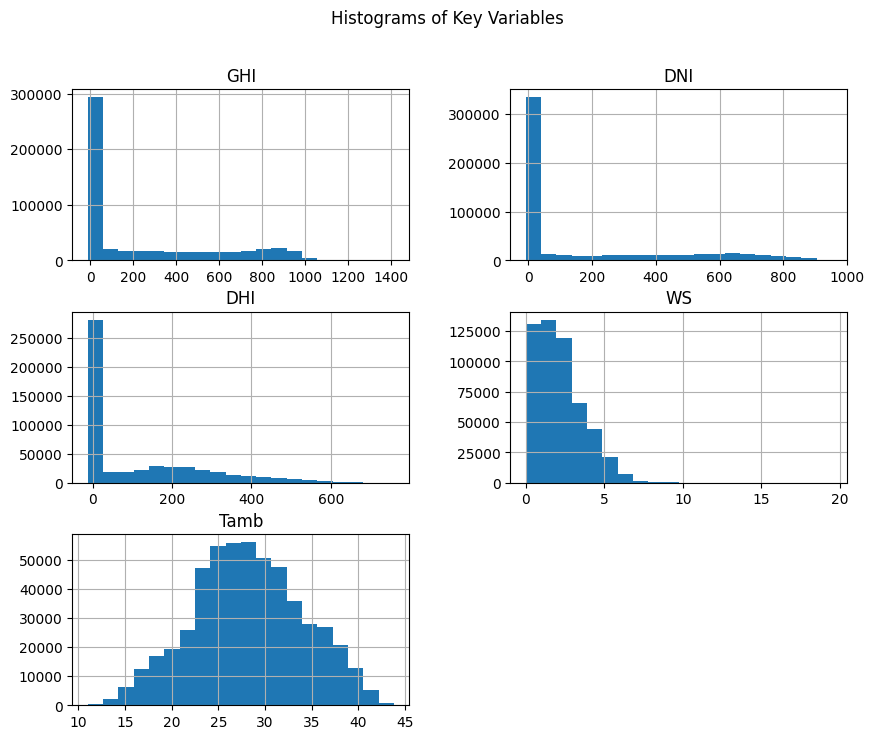

In [150]:
# Histograms
histograms = Histograms(df_benin)
histograms.plot_histograms(['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])

## Z-Score Analysis

Calculating Z-scores to identify significant outliers in the data.

In [151]:
# # Define columns for Z-score analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']

# Z-score analysis
z_score_analysis = ZScoreAnalysis(df_benin)
z_score_analysis.calculate_z_scores(columns_to_analyze)
z_score_analysis.plot_z_scores() 

AttributeError: 'ZScoreAnalysis' object has no attribute 'plot_z_scores'

## Bubble Charts

Creating bubble charts to explore relationships between variables such as GHI vs. Tamb vs. WS.

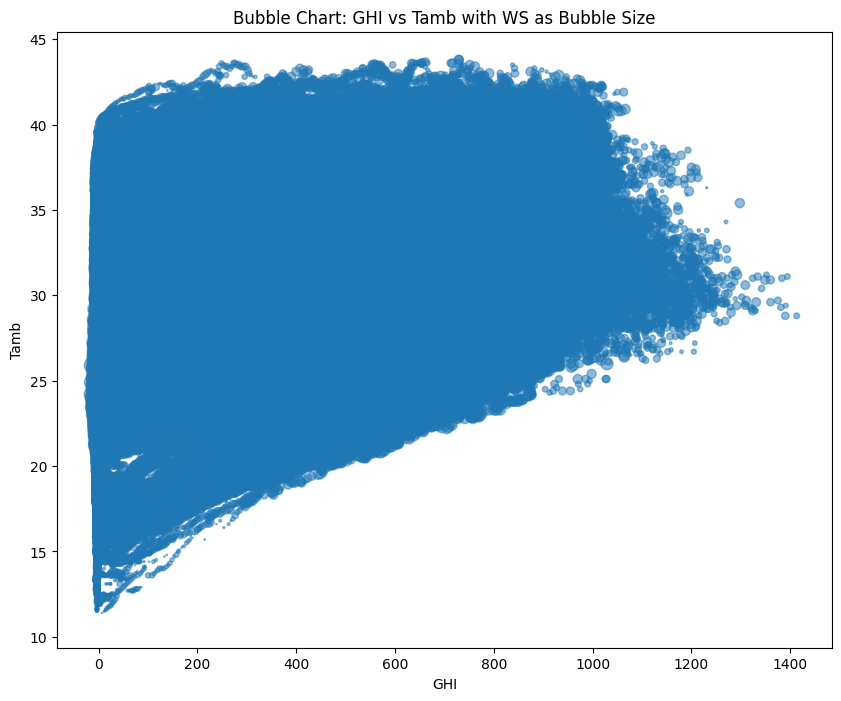

In [153]:
# Bubble charts
bubble_charts = BubbleCharts(df_benin)
bubble_charts.plot_bubble_chart('GHI', 'Tamb', 'WS')